In [ ]:
#### 데이터 준비
import numpy as np
x = np.array([1,2,1,1,1,2,2,1,1])
y = np.array([100,200,100,50,10,20,20,10,10])
len(x),len(y),x.mean(), y.mean()


(9, 9, 1.3333333333333333, 57.77777777777778)

In [ ]:
np.reshape(x,(-1,1))

array([[1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1]])

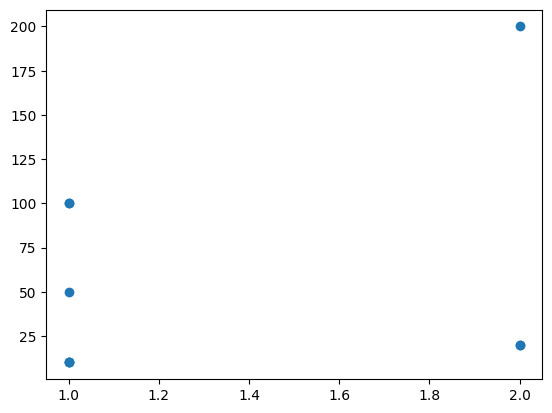

In [ ]:
#### 데이터 산점도 확인
import matplotlib.pyplot as plt
plt.scatter(x,y)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression() #추정기함수 활성화
model.fit(np.reshape(x,(-1,1)),y) #w,b가 생성

LinearRegression()

In [ ]:
w,b=model.coef_,model.intercept_

In [ ]:
newX=3
newX=np.reshape(newX,(-1,1))
newY=newX*w + b
newY , model.predict(newX)

(array([[113.33333333]]), array([113.33333333]))

# 사이킷런 패키지 이해 (타이타닉 생존자예측 모델 만들기)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
import numpy as np
##########데이터 로드
train_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/binary_classification/%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_b0fdSDZ.xlsx?raw=true', sheet_name='train')
test_df = pd.read_excel('https://github.com/cranberryai/todak_todak_python/blob/master/machine_learning/binary_classification/%E1%84%90%E1%85%A1%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A1%E1%84%82%E1%85%B5%E1%86%A8_b0fdSDZ.xlsx?raw=true', sheet_name='test')

train_df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survival
0,2,"Lehmann, Miss. Bertha",Female,17,0,0,SC 1748,12.00,C,1
1,3,"Laitinen, Miss. Kristina Sofia",Female,37,0,0,4135,9.59,S,0
2,3,"Rosblom, Mr. Viktor Richard",Male,18,1,1,370129,20.21,S,0
3,3,"Karaic, Mr. Milan",Male,30,0,0,349246,7.90,S,0
4,3,"Moen, Mr. Sigurd Hansen",Male,25,0,0,348123,7.65,S,0


In [ ]:
labels = ['사망', '생존'] # 0,1

In [ ]:
##########survival EDA후 아래작업 실행
##########데이터 전처리
x_train = train_df.drop(['name', 'ticket', 'survival'], axis=1)
x_test = test_df.drop(['name', 'ticket', 'survival'], axis=1)

In [ ]:
y_train = train_df['survival']
y_test = test_df['survival']

In [ ]:
print(x_train.head())

   pclass     sex  age  sibsp  parch   fare embarked
0       2  Female   17      0      0  12.00        C
1       3  Female   37      0      0   9.59        S
2       3    Male   18      1      1  20.21        S
3       3    Male   30      0      0   7.90        S
4       3    Male   25      0      0   7.65        S


## 머신러닝에 들어가는 x데이터는 문자데이터는 안됨
## 벡터데이터야함
## 성별은 male은 0 Female은 1은 1
## embarked를 0,1,2,3,....4 로 줬을때 이 값이 순서대로 값의 크기가 의미가 있는가를 고민
## 문자를 단순하게 숫자 0,1,2,3,..로 작성을 하지 않음. --> 원핫인코딩작업을 실행
## x데이터는 더미변수화, y변수는 원핫인코딩

In [ ]:
#머신러닝에 들어가는 x데이터는 문자데이터는 안됨
# 벡터데이터야함
# 성별은 male은 0 Female은 1은 1
# embarked를 0,1,2,3,....4 로 줬을때 이 값이 순서대로 값의 크기가 의미가 있는가를 고민
# 문자를 단순하게 숫자 0,1,2,3,..로 작성을 하지 않음. --> 원핫인코딩작업을 실행
# x데이터는 더미변수화, y변수는 원핫인코딩

In [ ]:
print(x_train.columns)

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')


In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['pclass', 'sex', 'embarked']),
    remainder='passthrough')
transformer.fit(x_train)
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [ ]:
x_train[0]
#array([ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0., 17.,  0.,  0., 12.])

array([ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0., 17.,  0.,  0., 12.])

In [ ]:
##########모델 생성
model = LogisticRegression()
##########모델 학습
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
##########모델 검증
print(model.score(x_train, y_train)) #0.7945205479452054
print(model.score(x_test, y_test)) #0.7795527156549521


0.7945205479452054
0.7763578274760383


In [ ]:
model.predict(x_test) # 위에있는 77%는 이 결과값의 1,0,0 값하고 y_train값하고의 일치율이 77%이다.

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [ ]:
model.predict_proba(x_test)[:5]

array([[0.13246736, 0.86753264],
       [0.90265405, 0.09734595],
       [0.60918187, 0.39081813],
       [0.82355928, 0.17644072],
       [0.35993094, 0.64006906]])

In [ ]:
##########모델 예측
newx_test = [
    [2, 'Female', 21, 0, 1, 21.00, 'S']
]
newx_test = pd.DataFrame(newx_test, columns=['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'])
newx_test = transformer.transform(newx_test)
y_predict = model.predict(newx_test)
label = labels[y_predict[0]]
y_predict = model.predict_proba(x_test)
confidence = y_predict[0][y_predict[0].argmax()]
print(label, confidence)

생존 0.867532641303584


생존 0.867532641303584
